In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#***load dataset:-***

In [4]:
df=pd.read_csv('/content/Ransomware_Dataset.csv')

In [5]:
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


#***EDA(Explotary Data Analysis):-***

In [6]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [7]:
#data describe
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [8]:
#dataset check the shape of dataset
df.shape

(62485, 18)

In [9]:
#dataset has null values
df.isnull().sum()

,0
FileName,0
md5Hash,0
Machine,0
DebugSize,0
DebugRVA,0
MajorImageVersion,0
MajorOSVersion,0
ExportRVA,0
ExportSize,0
IatVRA,0


In [10]:
#check the duplicated rows
df.duplicated().sum()

np.int64(0)

In [11]:
#check the column
df.columns

Index(['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA',
       'MajorImageVersion', 'MajorOSVersion', 'ExportRVA', 'ExportSize',
       'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'NumberOfSections', 'SizeOfStackReserve', 'DllCharacteristics',
       'ResourceSize', 'BitcoinAddresses', 'Benign'],
      dtype='object')

In [12]:
#Drop the unessary column
df.drop(['FileName','md5Hash'],axis=1,inplace=True)

In [13]:
#check the shape of dataset
df.shape

(62485, 16)

In [14]:
# To check the datatypes of the all the column
df.dtypes

,0
Machine,int64
DebugSize,int64
DebugRVA,int64
MajorImageVersion,int64
MajorOSVersion,int64
ExportRVA,int64
ExportSize,int64
IatVRA,int64
MajorLinkerVersion,int64
MinorLinkerVersion,int64


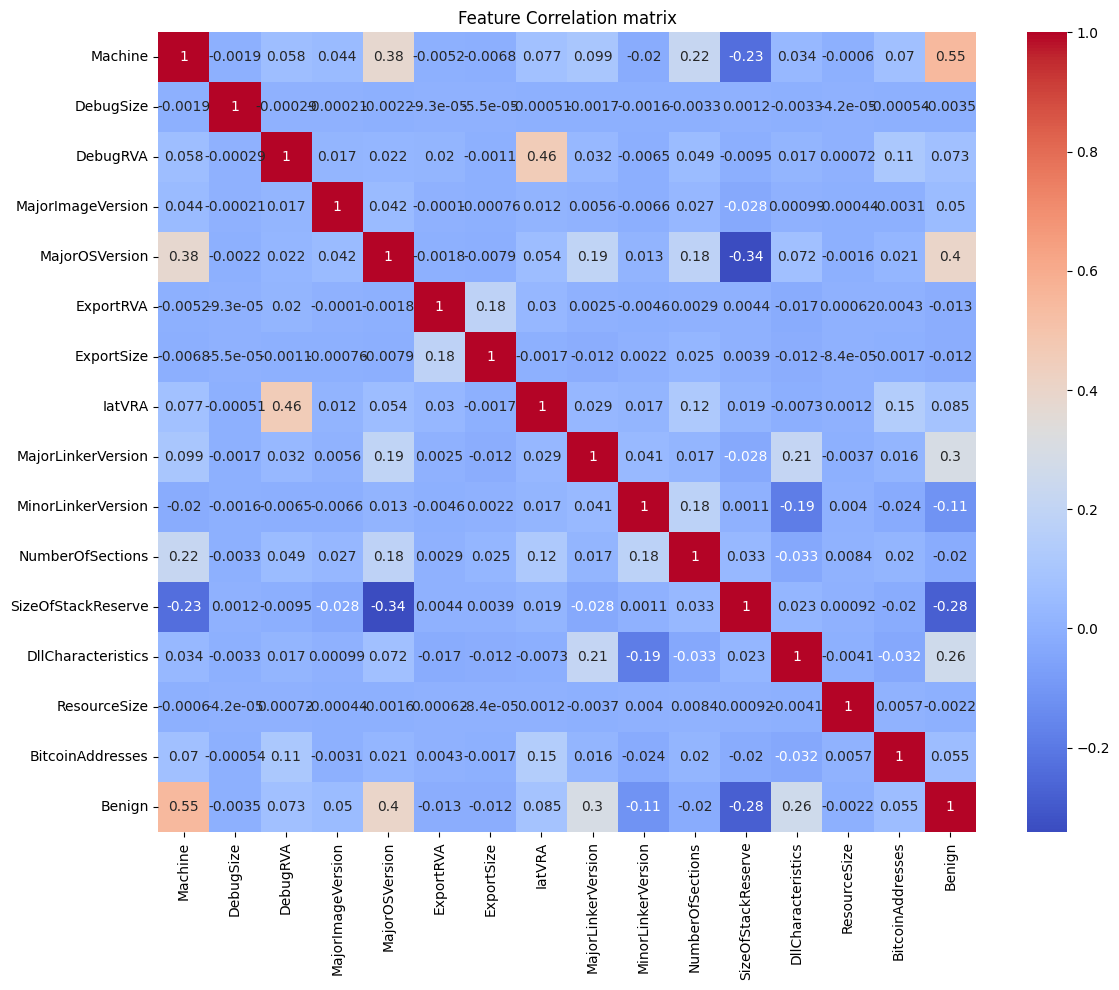

In [15]:
# correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation matrix")
plt.tight_layout()
plt.show()

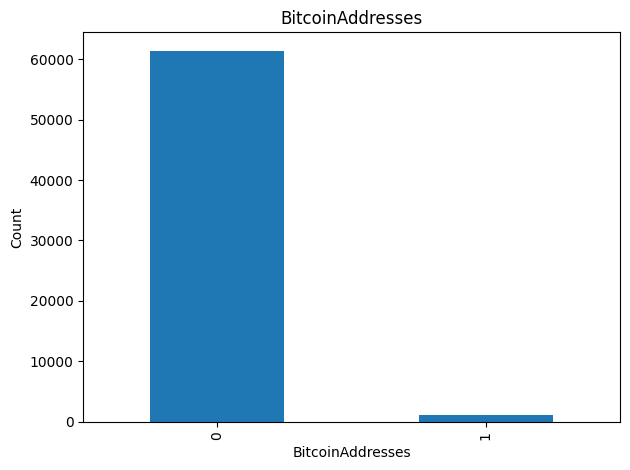

In [16]:
# label distribution of bitcoin address
plt.figure()
label_count=df['BitcoinAddresses'].value_counts()
label_count.plot(kind="bar",title="BitcoinAddresses")
plt.xlabel("BitcoinAddresses")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

BitcoinAddresses → 0 or 1
⚠️ Very imbalanced feature scales

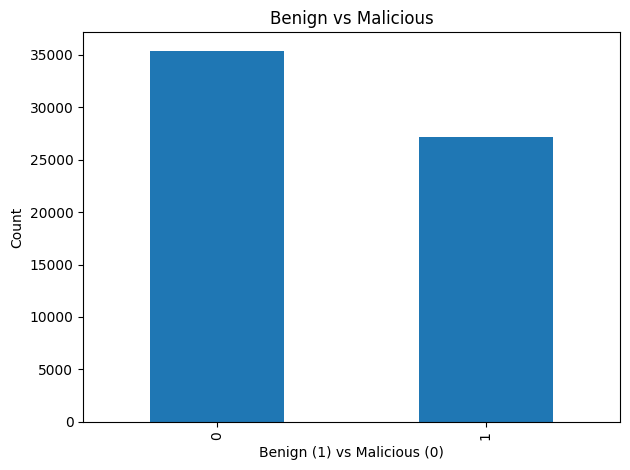

In [17]:
# label distribution
plt.figure()
label_count=df["Benign"].value_counts()
label_count.plot(kind="bar",title="Benign vs Malicious")
plt.xlabel("Benign (1) vs Malicious (0)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#***Spliting the dataset:-***

In [18]:
#spliting to the dataset in X,y
X=df.drop('Benign',axis=1)
y=df['Benign']  #target column

In [19]:
# Feature Scaling
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)

In [20]:
# Convert scaled array back into DataFrame (with original column names!)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

In [21]:
X_scaled.head()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses
0,-0.481400,-0.004004,-0.081004,-0.052767,-0.557274,-0.023689,-0.014358,-0.123099,-0.197036,-0.389552,-0.818853,0.274474,1.341528,-0.010608,-0.135405
1,2.071691,-0.003991,-0.017042,-0.043791,1.801516,-0.020340,-0.014185,-0.130383,0.466161,0.199503,1.519161,-0.976186,0.247292,-0.010588,-0.135405
2,-0.481400,-0.004004,-0.081004,-0.052767,-0.557274,-0.023689,-0.014358,-0.123099,-0.197036,-0.389552,-0.818853,0.274474,1.341528,-0.010608,-0.135405
3,2.071691,-0.003991,-0.070546,-0.043791,1.801516,-0.023125,-0.014349,-0.114235,0.466161,0.199503,0.583955,-0.976186,0.239172,-0.010587,-0.135405
4,2.071691,-0.003991,-0.029653,-0.043791,1.801516,-0.020890,-0.014293,-0.067613,0.466161,0.199503,1.051558,-0.976186,0.239172,-0.010583,-0.135405


#***Spliting the dataset to Train and Test:-***

In [22]:
#spliting the Train and Test
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [23]:
#Shape of dataset train and test
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(43739, 15) (18746, 15) (43739,) (18746,)


In [24]:
y_train.value_counts()

,count
Benign,
0,24689
1,19050


#***Model Building:-***

In [25]:
model={
    "LogisticRegression":LogisticRegression(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier()
}

In [26]:
# Store results
results = {}

# Loop through models and evaluate
for name, clf in model.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]  # For ROC-AUC

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

In [27]:
# Save results
results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc,
        "Classification Report": classification_report(y_test, y_pred)
    }

In [28]:
# Print all results nicely
for name, metrics in results.items():
    print(f"🔹 Model: {name}")
    print(f"✅ Accuracy: {metrics['Accuracy']:.4f}")
    print(f"🧐 Precision: {metrics['Precision']:.4f}")
    print(f"🛡️ Recall: {metrics['Recall']:.4f}")
    print(f"🎯 F1-Score: {metrics['F1-Score']:.4f}")
    print(f"📈 ROC-AUC: {metrics['ROC-AUC']:.4f}")
    print("📋 Classification Report:\n", metrics['Classification Report'])
    print("-" * 60)

🔹 Model: XGBClassifier
✅ Accuracy: 0.9956
🧐 Precision: 0.9959
🛡️ Recall: 0.9939
🎯 F1-Score: 0.9949
📈 ROC-AUC: 0.9996
📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10678
           1       1.00      0.99      0.99      8068

    accuracy                           1.00     18746
   macro avg       1.00      1.00      1.00     18746
weighted avg       1.00      1.00      1.00     18746

------------------------------------------------------------


In [29]:
# Dictionary to store scores
model_scores = {}

In [30]:
model_scores[name] = acc  # Store accuracy

# Find best model based on Accuracy
best_model_name = max(model_scores, key=model_scores.get)
best_model = model[best_model_name]

In [31]:
best_model_name

'XGBClassifier'

In [32]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#***Save the Model:-***

In [33]:
import pickle
#save the model
filename='model.pkl'
pickle.dump(best_model,open(filename,'wb'))